In [70]:
from shapely import geometry
import math
import matplotlib.pyplot as plt

In [63]:
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]

In [64]:
polygon = geometry.Polygon(coordinates)

In [67]:
list(polygon.centroid.coords[0])

[53.31964, 6.811994999999998]

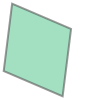

In [66]:
polygon

In [73]:
%%time
center = [53.31964, 6.811994999999998]
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]
# in kilometers??
d = 10/1000
r_earth = 6378

new_cs = []

for coord in coordinates:
    # point above or under center:
    if coord[0] > center[0]:
        new_latitude  = coord[0]  + (d / r_earth) * (180 / math.pi);
    else:
        new_latitude  = coord[0]  - (d / r_earth) * (180 / math.pi);
    
    # point left or right center
    if coord[1] > center[1]:
        new_longitude = coord[1] + (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180);
    else:
        new_longitude = coord[1] - (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180);
        
    new_cs.append([new_latitude, new_longitude])

Wall time: 0 ns


In [74]:
polygon2 = geometry.Polygon(new_cs)

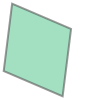

In [75]:
polygon

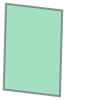

In [76]:
polygon2

array('d', [53.3196, 53.31961, 53.31968, 53.31967, 53.3196]) array('d', [6.81197, 6.81205, 6.81202, 6.81194, 6.81197])


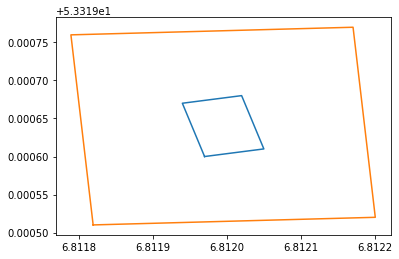

In [82]:
x,y = polygon.exterior.xy
l,k = polygon2.exterior.xy
print(x,y)

plt.plot(y,x)
plt.plot(k,l)

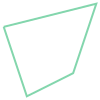

In [62]:
polygon.exterior

In [ ]:
known_point = [53.31960, 6.81197]
center = [53.31964, 6.811994999999998]
d = 10/1000
r_earth = 6378
d_latitude = (d / r_earth) * (180 / math.pi)
d_longitude = (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180)



In [26]:
import pyclipper

subj = ((180, 200), (260, 200), (260, 150), (180, 150))

pco = pyclipper.PyclipperOffset()
pco.AddPath(subj, pyclipper.JT_ROUND, pyclipper.ET_CLOSEDPOLYGON)

solution = pco.Execute(-7.0)
solution

[[[253, 193], [187, 193], [187, 157], [253, 157]]]

POLYGON ((53.3196 6.81197, 53.31961 6.81205, 53.31968 6.81202, 53.31967 6.81194, 53.3196 6.81197))
POLYGON ((53.31951016847159 6.812120383196696, 53.31952016847158 6.812200383231934, 53.31959016847158 6.812170383478601, 53.31958016847159 6.812090383443362, 53.31951016847159 6.812120383196696))


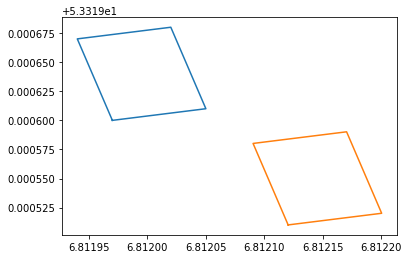

In [44]:
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]
polygon = geometry.Polygon(coordinates)

scaled_coordinates = []

R = 6378137

dn = 10
de = 10

for coord in coordinates:
    lat = coord[0]
    lon = coord[1]

    dLat = dn / R
    dLon = de / (R * math.cos(math.pi * lat / 180))

    lat0 = lat + dLat * 180 / math.pi
    lon0 = lon + dLon * 180 / math.pi
    
    scaled_coordinates.append([lat0, lon0])

scaled_polygon = geometry.Polygon(scaled_coordinates)

print(polygon)
print(scaled_polygon)
x,y = polygon.exterior.xy
l,k = scaled_polygon.exterior.xy

plt.plot(y,x)
plt.plot(k,l)

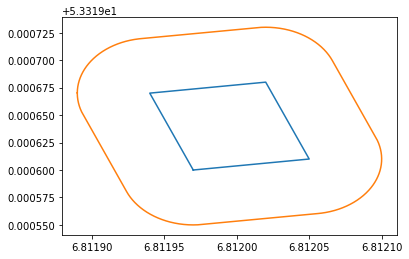

In [77]:
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]

clipper_offset     = pyclipper.PyclipperOffset()
coordinates_scaled = pyclipper.scale_to_clipper(coordinates)

clipper_offset.AddPath(coordinates_scaled, pyclipper.JT_ROUND, pyclipper.ET_CLOSEDPOLYGON)

new_coordinates = clipper_offset.Execute(pyclipper.scale_to_clipper(.00005))

scaled_coordinates = pyclipper.scale_from_clipper(new_coordinates)

polygon        = geometry.Polygon(coordinates)
scaled_polygon = geometry.Polygon(scaled_coordinates[0])

x,y = polygon.exterior.xy
l,k = scaled_polygon.exterior.xy

plt.plot(y,x)
plt.plot(k,l)